### This script contains the following points:
#### Section 1a: Importing libraries, defining project path, importing dataset (named "df_exp")
- Importing dataset "expeditions_30yrs_subset.pkl" as "df_exp"

#### Section 1b: Answering some initial questions to help create subset before analysis (named "df_mount")
- Finding most deadly peaks (using variable 'mbr_deaths')
- Finding highest max elevations by peak (using variable 'max_elev_reached')
- Finding most climbed peaks (using variable 'total_mbrs')
- Creating subset containing only peaks that are on the top ten list for either max elevation reached, member deaths, or total members (see section 7 a visual of this overview) - named "df_mount"

#### Section 2: Selecting variables to create subset for exploratory visual analysis (named "sub")

#### Section 3: Creating correlation matrix heatmap (colored)
- Correlation heatmap made with matplotlib
- Correlation heatmap made with matplotlib with labels, legend, and changing size
- Correlation heatmap made with seaborn with correlation coefficient labels

#### Section 4: Creating scatterplot for variables with the strongest correlations
- Scatterplot for "hired_summits" and "mbrs_summited"
- Scatterplot for "hired_summits" and "hired_abc"
- Scatterplot for "is_o2_used" and "max_elev_reached"

#### Section 5: Creating a pair plot of the subset of the dataframe (named "sub_2")

#### Section 6: Creating categorical plots
- Overview of Categories
- Creating Histogram to find categories - 'max_elev_reached'
- Creating categories using 'max_elev_reached' - 'Elev Reached Category'
- Creating categories using 'exp_result' - 'Result Category'
- Creating categories using categorical O2 variables - 'Oxygen Category'
- Analyzing 'mbrs_summited' vs 'hired_abc' with categories
- Analyzing 'max_elev_reached' vs 'total_days' with categories

#### Section 7: Revisiting questions from previous task

#### Section 8: Defining a hypothesis

#### Section 9: Exporting dataframe "df_mount" as "expeditions_peak_recent_subset.pkl"

## Section 1a: Importing libraries, defining project path, importing datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.5.2'

In [3]:
# Ensuring charts created are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
# Defining project folder path
path = r'C:\Users\prena\05-2023 Himalayan Expeditions Analysis'

In [5]:
# Importing expeditions.pkl dataset
df_exp = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'expeditions_30yrs_subset.pkl'))

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
pd.set_option("display.max_rows", None)

In [8]:
df_exp.head()

,peak_id,peak_name,nationality,year,season,bc_arrived,bc_left,summit_day,total_days,exp_result,max_elev_reached,total_mbrs,mbrs_summited,mbrs_deaths,hired_abc,hired_summits,hired_deaths,is_no_hired_abc,is_o2_not_used,is_o2_climbing,is_o2_descent,is_o2_sleeping,is_o2_medical,is_o2_used,had_o2_unused,is_o2_unkwn_2,o2_check
69,AMAD,Ama Dablam,Austria,1990,Autumn,1990-10-01,1990-10-12,1990-10-11,11,Bad Conditions,6200,3,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
70,AMAD,Ama Dablam,Germany,1990,Autumn,1990-10-07,1990-10-28,1990-10-22,21,Success,6814,4,4,0,2,0,0,0,1,0,0,0,0,0,0,0,1
73,AMAD,Ama Dablam,USA,1990,Autumn,1990-10-30,1990-11-13,1990-11-12,14,Lack of Time,6600,7,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1
75,AMAD,Ama Dablam,Norway,1990,Winter,1990-11-20,1990-12-07,1990-12-02,17,Success,6814,6,3,0,0,0,0,1,1,0,0,0,0,0,0,0,1
77,AMAD,Ama Dablam,New Zealand,1990,Winter,1990-12-02,1990-12-05,1990-12-04,3,Success,6814,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1


## Section 1b: Answering some initial questions to help create subsets before analysis

In [9]:
# Finding most deadly peaks
df_exp.groupby('peak_name')['mbrs_deaths'].sum().sort_values(ascending=False).head(10)

peak_name
Everest          73
Manaslu          37
Dhaulagiri I     32
Cho Oyu          23
Annapurna I      20
Pumori           16
Kangchenjunga    15
Ama Dablam       14
Makalu           13
Lhotse            7
Name: mbrs_deaths, dtype: int64

In [51]:
# Finding largest max_elev_reached peaks
df_exp.groupby('peak_name')['max_elev_reached'].max().sort_values(ascending=False).head(5)

peak_name
Everest          8850
Kangchenjunga    8586
Lhotse           8516
Yalung Kang      8505
Makalu           8485
Name: max_elev_reached, dtype: int64

In [11]:
# Finding most popular peaks
df_exp.groupby('peak_name')['total_mbrs'].sum().sort_values(ascending=False).head(10)

peak_name
Everest          8149
Cho Oyu          5151
Ama Dablam       4911
Manaslu          2490
Baruntse         1329
Dhaulagiri I     1288
Lhotse           1266
Makalu           1137
Pumori           1072
Himlung Himal     706
Name: total_mbrs, dtype: int64

In [12]:
# Matching peak name to peak id
df_exp.groupby('peak_name')['peak_id'].max().sort_values(ascending=True)

peak_name
Ama Dablam               AMAD
Amotsang                 AMOT
Amphu I                  AMPH
Amphu Middle             AMPM
Anidesh Chuli            ANID
Annapurna I              ANN1
Annapurna II             ANN2
Annapurna III            ANN3
Annapurna IV             ANN4
Annapurna I East         ANNE
Annapurna I Middle       ANNM
Annapurna South          ANNS
Api Main                 APIM
Ardang                   ARDN
Arniko Chuli             ARNK
Bamongo                  BAMO
Baruntse                 BARU
Beding Go                BEDG
Bhrikuti                 BHRI
Bhrikuti Shail           BHRS
Bijora Hiunchuli         BIJO
Bobaye                   BOBA
Boktoh                   BOKT
Bhairab Takura           BTAK
Burke Kang               BURK
Chhopa Bamare            CBAM
Chago                    CHAG
Chako                    CHAK
Chamlang                 CHAM
Changla                  CHAN
Chaw Peak                CHAW
Chekigo                  CHEK
Chhiv Himal              CHIV


In [13]:
# Create subset containing expeditions that are on the top ten list for either max elevation reached, member deaths, or total members
df_mount = df_exp[df_exp.peak_id.isin(['EVER','MANA','DHA1','ANN1','PUMO','KANG','AMAD','LHOT','BARU','CHOY','MAKA','HIML'])]

In [14]:
df_mount.shape

(5776, 27)

In [15]:
df_mount['peak_id'].value_counts(dropna = False)

EVER    1562
CHOY    1044
AMAD    1036
MANA     516
LHOT     322
DHA1     265
MAKA     245
BARU     233
PUMO     175
ANN1     143
HIML     118
KANG     117
Name: peak_id, dtype: int64

In [16]:
df_mount.describe()

,year,total_days,max_elev_reached,total_mbrs,mbrs_summited,mbrs_deaths,hired_abc,hired_summits,hired_deaths,is_no_hired_abc,is_o2_not_used,is_o2_climbing,is_o2_descent,is_o2_sleeping,is_o2_medical,is_o2_used,had_o2_unused,is_o2_unkwn_2,o2_check
count,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000,5776.000000
mean,2007.033414,26.720568,7666.263331,4.976627,1.838643,0.044148,2.484072,1.141620,0.020949,0.300208,0.620672,0.343144,0.017659,0.205852,0.034280,0.377251,0.106129,0.002770,1.707756
std,7.219389,13.898974,945.364022,3.818657,2.448133,0.261776,3.354251,2.135179,0.207423,0.458388,0.485262,0.474800,0.131721,0.404358,0.181963,0.484740,0.308029,0.052563,0.829405
min,1990.000000,1.000000,4950.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2002.000000,15.000000,6814.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2008.000000,26.000000,8012.500000,4.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2012.000000,37.000000,8485.000000,7.000000,3.000000,0.000000,3.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000
max,2019.000000,71.000000,8850.000000,17.000000,16.000000,5.000000,30.000000,24.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


## Section 2: Selecting variables to create subset for exploratory visual analysis (named "sub")

Now that I have a subset decided on (2010-2020, and top 10 peaks for max elevation reached, deadliest, and most climbed), I'm choosing the following variables for my visual analysis:

In [17]:
# Create subset ('sub') that contains quantitative variables (+ a couple categorical to see what happens)
sub = df_mount[['total_days','max_elev_reached','total_mbrs','mbrs_summited', 'mbrs_deaths','hired_abc','hired_summits','hired_deaths','is_o2_not_used','is_o2_used']]

In [18]:
sub.head()

,total_days,max_elev_reached,total_mbrs,mbrs_summited,mbrs_deaths,hired_abc,hired_summits,hired_deaths,is_o2_not_used,is_o2_used
69,11,6200,3,0,0,0,0,0,1,0
70,21,6814,4,4,0,2,0,0,1,0
73,14,6600,7,0,0,0,0,0,1,0
75,17,6814,6,3,0,0,0,0,1,0
77,3,6814,1,1,0,0,0,0,1,0


In [19]:
# Create table to see how variables correlate to each other
sub.corr()

,total_days,max_elev_reached,total_mbrs,mbrs_summited,mbrs_deaths,hired_abc,hired_summits,hired_deaths,is_o2_not_used,is_o2_used
total_days,1.000000,0.686982,0.142534,0.084251,0.052554,0.276028,0.209662,0.019569,-0.497306,0.501173
max_elev_reached,0.686982,1.000000,0.082756,0.283116,0.025317,0.269491,0.367420,-0.041241,-0.646961,0.650784
total_mbrs,0.142534,0.082756,1.000000,0.550756,0.119171,0.524782,0.401625,0.066640,-0.125144,0.125814
mbrs_summited,0.084251,0.283116,0.550756,1.000000,0.014360,0.444625,0.708448,-0.032898,-0.266235,0.266676
mbrs_deaths,0.052554,0.025317,0.119171,0.014360,1.000000,0.028311,0.001514,0.094581,-0.028996,0.028385
hired_abc,0.276028,0.269491,0.524782,0.444625,0.028311,1.000000,0.692455,0.135001,-0.410472,0.411425
hired_summits,0.209662,0.367420,0.401625,0.708448,0.001514,0.692455,1.000000,-0.008655,-0.452856,0.454297
hired_deaths,0.019569,-0.041241,0.066640,-0.032898,0.094581,0.135001,-0.008655,1.000000,0.006707,-0.006281
is_o2_not_used,-0.497306,-0.646961,-0.125144,-0.266235,-0.028996,-0.410472,-0.452856,0.006707,1.000000,-0.995593
is_o2_used,0.501173,0.650784,0.125814,0.266676,0.028385,0.411425,0.454297,-0.006281,-0.995593,1.000000


## Section 3: Creating correlation matrix heatmap (colored)

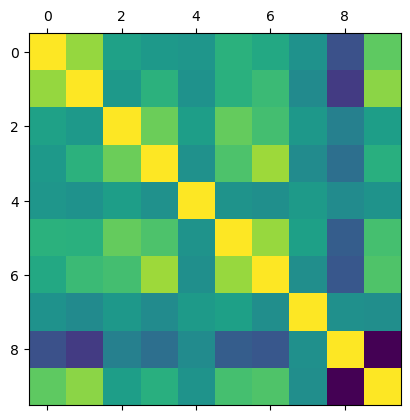

In [20]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

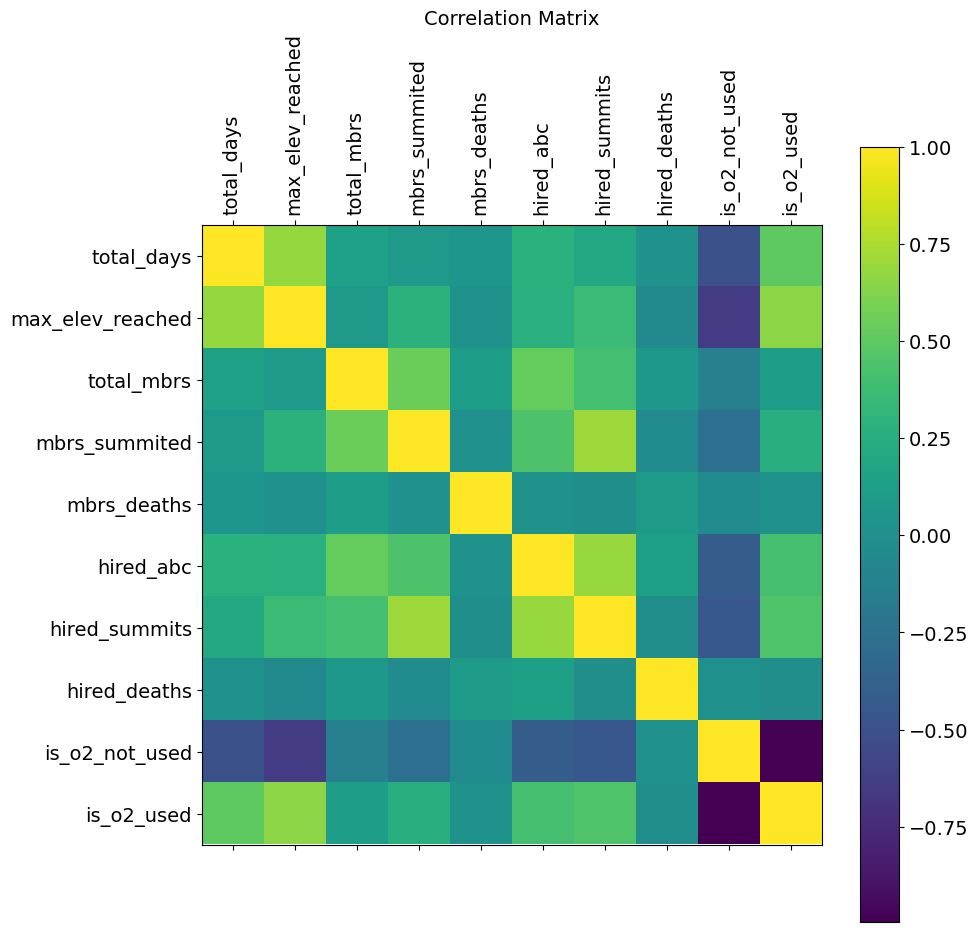

In [21]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(10,10)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

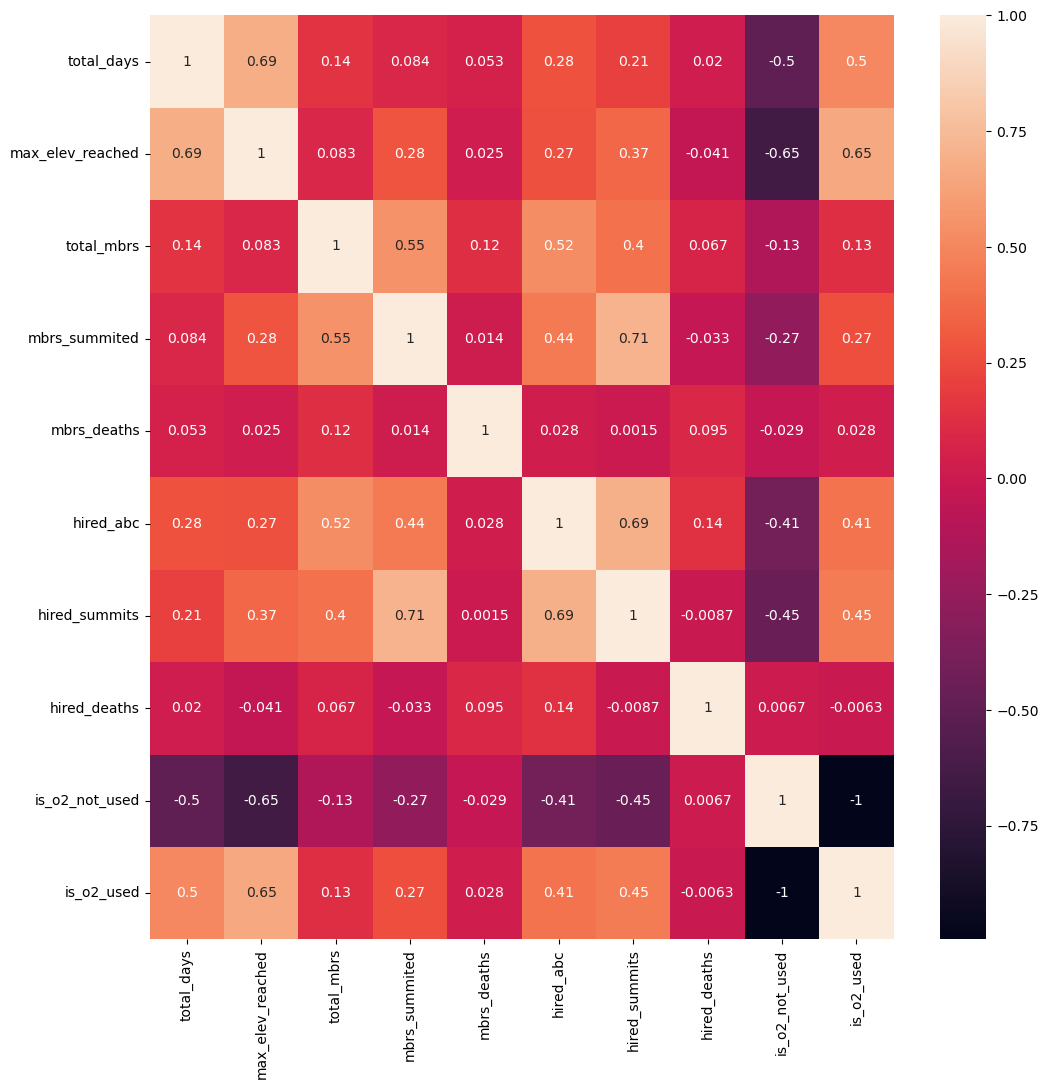

In [22]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(12,12))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

The above correlation matrix heatmap shows at the cross-section of each pair of variables the correlation coefficient for those two varialbes. The negatives indicate a negative relationship (with -1 being a perfect negative relationship), the positives indicate a positive relationship (with 1 being a perfect positive relationship), and a 0 indicates no relationship. For reference, on a scale our coefficients mean the following:
- 0: no relationship
- 0.1 - 0.3: weak relationship
- 0.3 - 0.5: moderate relationship
- 0.5 - 1.0: strong relationship

The 1's running diagonally from the top left corner to the bottom right corner are perfect positive relationships because we're comparing a variable to itself. (For example, the variables being compared at the top left are total days vs. total days).

Another interesting note, looking at the "mbrs_deaths" variable, there are no relationships that exceed 0.2. This tells us that none of our variables can help to explain the # of member deaths that occur on an expedition. 

Next, I've listed all of the variable pairs that have a strong positive relationship or strong negative relationship:

### 0.5 - 1.0: strong relationships
#### POSITIVE
- <u>a. (0.86) hired_summits and mbrs_summit - THIS ONE for catplots</u>
- b. (0.75) hired_summits and hired_abc
- c. (0.71) is_o2_used and max_elev_reached - (categorical variable used)
- <u>d. (0.69) max_elev_reached and total_days - THIS ONE for catplots</u>
- e. (0.68) hired_abc and total_mbrs
- f. (0.64) mbrs_summited and total_mbrs 
- g. (0.61) hired_abc and mbrs_summited
- h. (0.57) hired_summits and total_mbrs 
- i. (0.52) is_o2_used and total_days -(categorical variable used)

#### NEGATIVE
- j. (-0.99) is_o2_used and is_o2_not_used - (categorical variable used)
- k. (-0.70) is_o2_not_used and max_elev_reached  - (categorical variable used)
- l. (-0.51) is_o2_not_used and total_days - (categorical variable used)

We'll look at these more below!


## Section 4: Creating scatterplot for variables with the strongest correlations

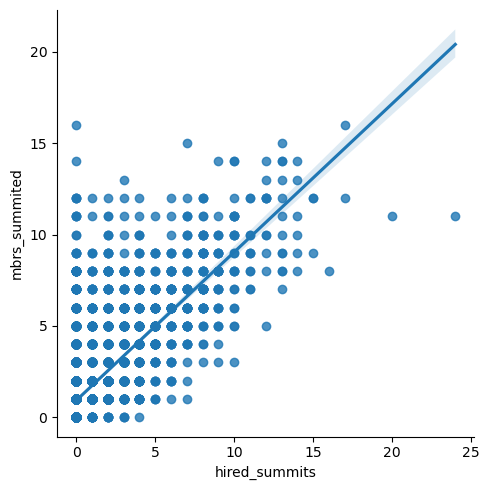

In [23]:
# a. Create a scatterplot for the "hired_summits" and "mbrs_summited" columns in seaborn

sns.lmplot(x = 'hired_summits', y = 'mbrs_summited', data = df_mount)

<b>Notes about output:</b> The 0.86 correlation coefficient suggested a strong relationship begwee variables 'mbrs_summited' and 'hired_summits.' This correlation makes sense, as if a climber reaches the summit of a peak, the hired sherpas would reach the summit of the peak as well. I would say that the plot points are clustered pretty closely to the line (with exception to some outliers) which suggests there's not a lot of variability. The variability that does exist could be attributed to climbers who summit who don't necessarily have hired guides. 

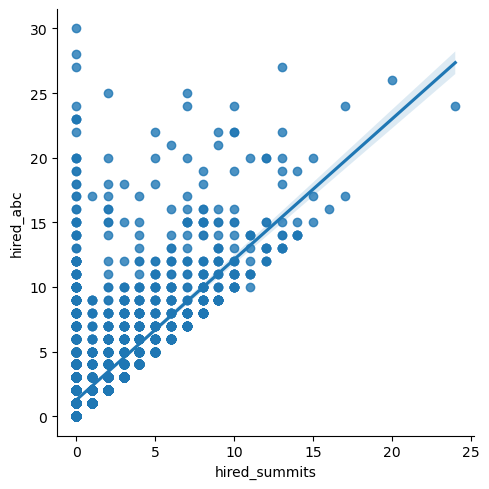

In [24]:
# b. Create a scatterplot for the "hired_summits" and "hired_abc" columns in seaborn

sns.lmplot(x = 'hired_summits', y = 'hired_abc', data = df_mount)

<b>Notes about output:</b> The 0.75 correlation coefficient suggests that there is a strong relationship between variables 'hired_abc' and 'hired_summits'. With this relationship, we can see a distinct invisible line that splits the graph in half between the upper left diagonal (where all the plot points live) and the lower right diagonal (where no plot points live). This tells us that the number of hired summits isn't going to exceed the number of hired guides. This makes sense, because hired summits is a subset of the variable hired guides (For example if there are 10 hired guides for an expedition, there can't be 11 hired guides that summit. The number of hired summits will be 10 or lower.)

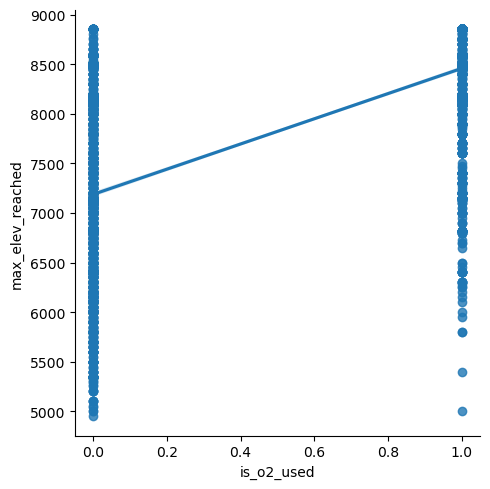

In [25]:
# c. Create a scatterplot for the "is_o2_used" and "max_elev_reached" columns in seaborn

sns.lmplot(x = 'is_o2_used', y = 'max_elev_reached', data = df_mount)

<b>Notes about output:</b> The 0.71 correlation coefficient suggests that the variables 'max_elev_reached' and 'is_o2_used' are strongly correlated. There are two distinct verticle lines that the plot points fall into which makes sense because 'is_o2_used' is a categorical variable. Even with this visual, though, we can gain some interesting insight into when oxygen is used. If we look at the plot points that fall into the '1' line on the right, the points are denser on top and more sparse towards the bottom of this vertical line. This tells us that oxygen is used has a higher elevation is reached. 

## Section 5: Pair Plots

In [26]:
# Keep only the variables you want to use in the pair plot

sub_2 = df_mount[['total_days','max_elev_reached','total_mbrs','mbrs_summited','hired_abc','hired_summits']]

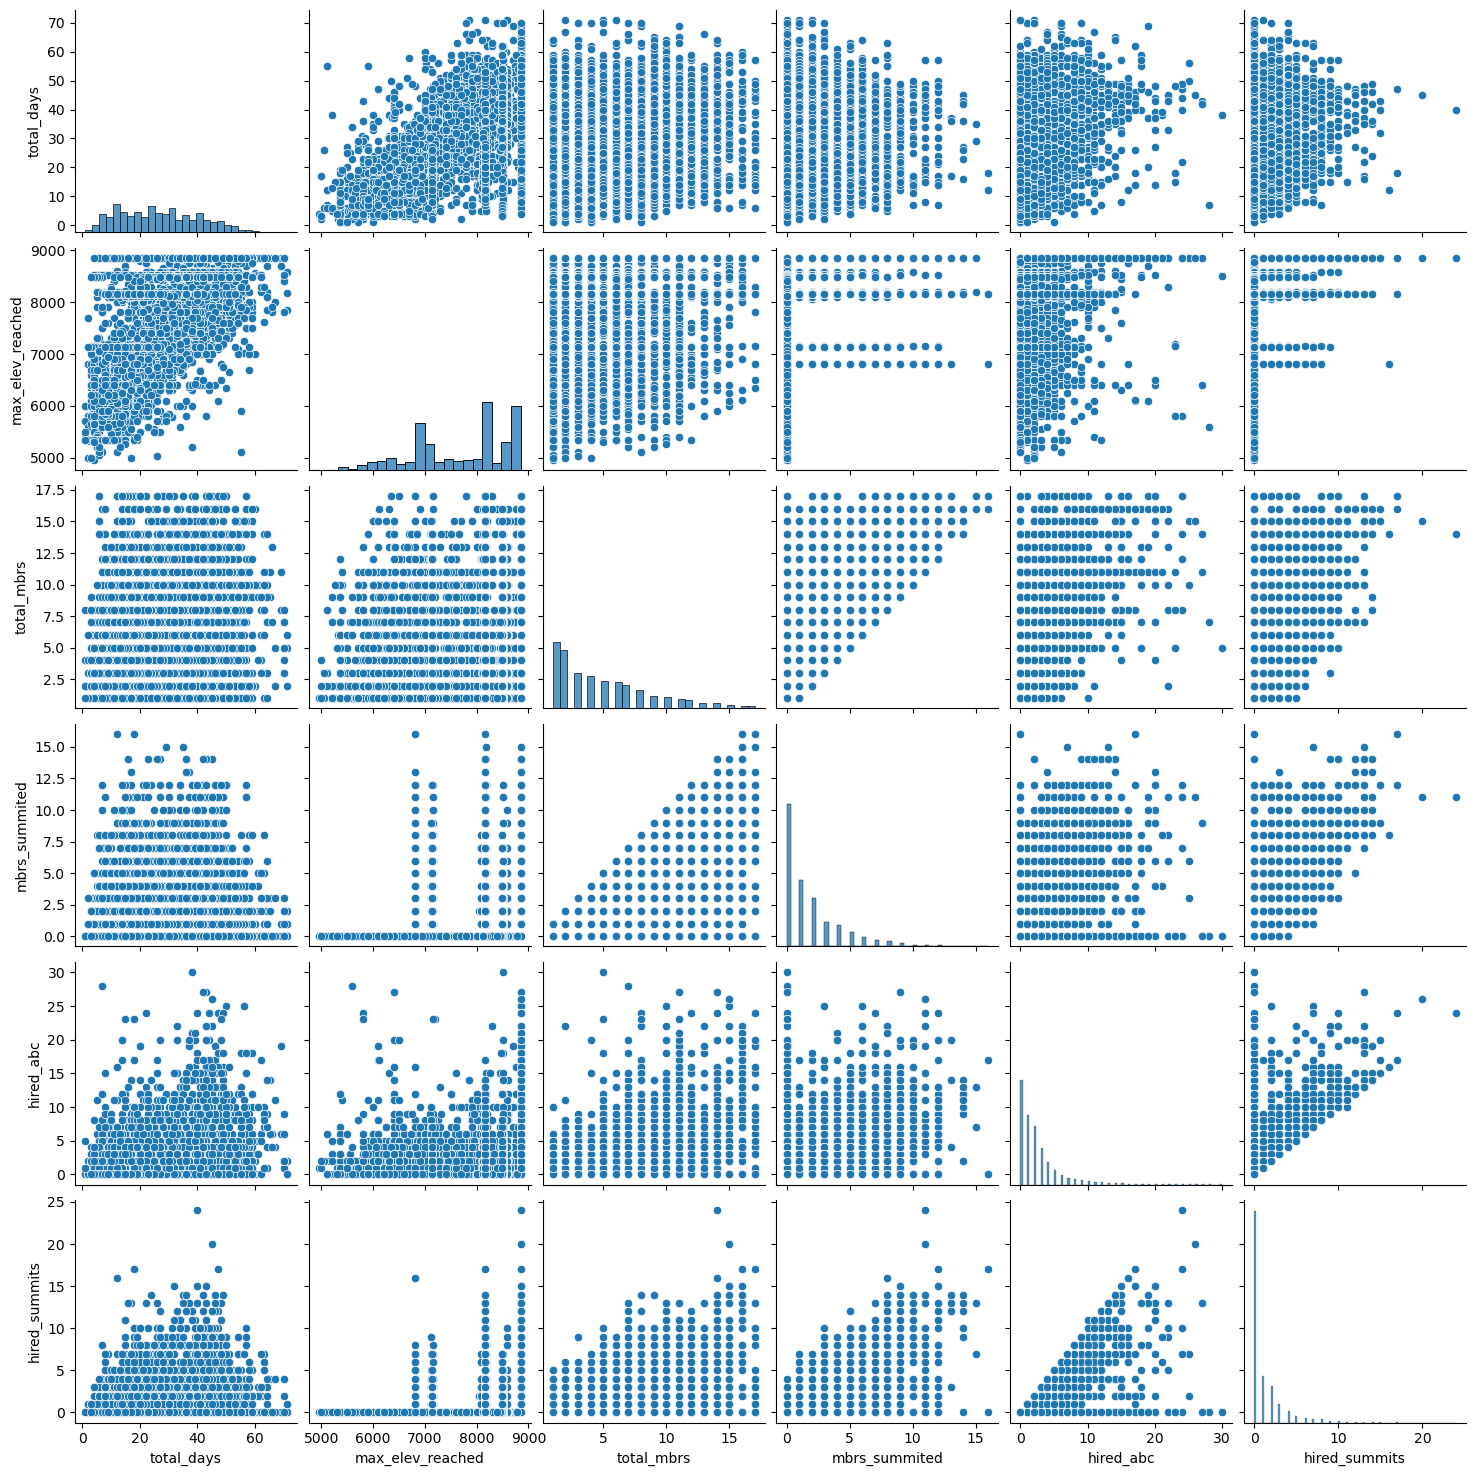

In [27]:
# Create a pair plot 

g = sns.pairplot(sub_2)

#### Comments on distribution of variables:
With my pair plot, I can see plots following into one of the following categories:
- Histogram where we're in the cross-section of the same variable (ex: 'total_days' vs. 'total_days')
- Scatterplots where there is an invisible diagonal line indicating one variable is a subset of the other (as with the 'hired_abc' and 'hired_summits' example above)
- Scatterplots where there are plot points condensed around vertical or horizontal lines (this seems to be true for scatterplots including the variable 'max_elev_reached')
- Scatterplots that look to have a general positive correlation (such as 'hired_abc' vs. 'mbrs_summited')
- Scatterplots that don't look to have a trend (such as 'hired_summits' and 'total_days')

#### Variables I'd like to explore further:
Based on the above, I'd like to look into the following pairs:

| Variable Pairs | Correlation Coefficient |
| :-: | :-: |
| <b>'mbrs_summited' vs 'hired_abc'</b> | 0.86 |
| <b>'max_elev_reached' vs 'total_days'</b> | 0.69 |

Both these pairs look to have a strong positive correlations based on their correlation coefficient while still looking 'random' (as opposed to looking at pairs where one variable is a subset of the other). 

Specifically with looking at the 'max_elev_reached' vs 'total_days' pair, I'd like to understand what the condensed plot points that make up these lines mean.

## Section 6: Exploring Categorical Plots

For the variable pairs chosen above, I want to explore four different categories:
- <b>Elev Reached Category:</b> split into 5 tiers (based on 'max_elev_reached' values)
    - <u>Tier 1:</u> <5500
    - <u>Tier 2:</u> >=5500, <6500
    - <u>Tier 3:</u> >=6500, <7500
    - <u>Tier 4:</u> >=7500, <8500
    - <u>Tier 5:</u> >=8500
    
- <b>Result Category:</b> expedition results split into 4 categories (based on 'exp_results' values)
    - <u>Successful:</u> 'Success (Claimed)','Success','Success (Subpeak, ForeSmt)'
    - <u>Unsuccessful:</u> 'Bad Weather','Illness, AMS','Bad Conditions','Last of Supplies','Route Difficulty','Lack of Time','Accident','Did not Climb'
    - <u>Other:</u> 'Other'
    - <u>Unknown:</u> 'Unknown'

- <b>Oxygen Category:</b> eight categorical O2 variables put into 3 separate categories when equaling '1' (or positive)
    - <u>Used:</u> when any of the following variables =1 - 'is_o2_used','is_o2_descent','is_o2_climbing','is_o2_medical','is_o2_sleeping'
    - <u>Not Used:</u> when any of the following variables =1 - 'is_o2_not_used','had_o2_unused'
    - <u>Unknown:</u> when the variable 'is_o2_unkwn_2" =1
    
- <b>Existing variable 'season':</b> season in which the expedition took place, 4 categories
    - <u>'Spring'</u>
    - <u>'Autumn'</u>
    - <u>'Winter'</u>
    - <u>'Summer'</u>

### Creating Histogram to find categories - 'max_elev_reached'

<AxesSubplot:xlabel='max_elev_reached', ylabel='Count'>

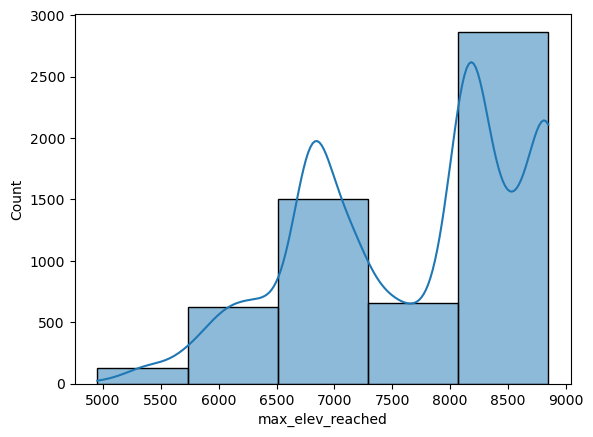

In [28]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_mount['max_elev_reached'], bins = 5, kde = True)

### Creating categories using 'max_elev_reached' - 'Elev Reached Category'

In [29]:
df_mount.loc[df_mount['max_elev_reached'] < 5500, 'Elev Reached Category'] = 'Tier 1'

C:\Users\prena\AppData\Local\Temp\ipykernel_2000\1365574267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mount.loc[df_mount['max_elev_reached'] < 5500, 'Elev Reached Category'] = 'Tier 1'


In [30]:
df_mount.loc[(df_mount['max_elev_reached'] >= 5500) & (df_mount['max_elev_reached'] < 6500), 'Elev Reached Category'] = 'Tier 2'

In [31]:
df_mount.loc[(df_mount['max_elev_reached'] >= 6500) & (df_mount['max_elev_reached'] < 7500), 'Elev Reached Category'] = 'Tier 3'

In [32]:
df_mount.loc[(df_mount['max_elev_reached'] >= 7500) & (df_mount['max_elev_reached'] < 8500), 'Elev Reached Category'] = 'Tier 4'

In [33]:
df_mount.loc[df_mount['max_elev_reached'] >= 8500, 'Elev Reached Category'] = 'Tier 5'

In [34]:
df_mount.columns

Index(['peak_id', 'peak_name', 'nationality', 'year', 'season', 'bc_arrived',
       'bc_left', 'summit_day', 'total_days', 'exp_result', 'max_elev_reached',
       'total_mbrs', 'mbrs_summited', 'mbrs_deaths', 'hired_abc',
       'hired_summits', 'hired_deaths', 'is_no_hired_abc', 'is_o2_not_used',
       'is_o2_climbing', 'is_o2_descent', 'is_o2_sleeping', 'is_o2_medical',
       'is_o2_used', 'had_o2_unused', 'is_o2_unkwn_2', 'o2_check',
       'Elev Reached Category'],
      dtype='object')

### Creating categories using 'exp_result' - 'Result Category'

In [35]:
df_mount.loc[(df_mount.exp_result.isin(['Success (Claimed)','Success','Success (Subpeak, ForeSmt)'])), 'Result Category'] = 'Successful'

C:\Users\prena\AppData\Local\Temp\ipykernel_2000\1352686601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mount.loc[(df_mount.exp_result.isin(['Success (Claimed)','Success','Success (Subpeak, ForeSmt)'])), 'Result Category'] = 'Successful'


In [36]:
df_mount.loc[(df_mount.exp_result.isin(['Bad Weather','Illness, AMS','Bad Conditions','Last of Supplies','Route Difficulty','Lack of Time','Accident','Did not Climb'])), 'Result Category'] = 'Unsuccessful'

In [37]:
df_mount.loc[(df_mount.exp_result.isin(['Other'])), 'Result Category'] = 'Other'

In [38]:
df_mount.loc[(df_mount.exp_result.isin(['Unknown'])), 'Result Category'] = 'Unknown'

In [39]:
df_mount.columns

Index(['peak_id', 'peak_name', 'nationality', 'year', 'season', 'bc_arrived',
       'bc_left', 'summit_day', 'total_days', 'exp_result', 'max_elev_reached',
       'total_mbrs', 'mbrs_summited', 'mbrs_deaths', 'hired_abc',
       'hired_summits', 'hired_deaths', 'is_no_hired_abc', 'is_o2_not_used',
       'is_o2_climbing', 'is_o2_descent', 'is_o2_sleeping', 'is_o2_medical',
       'is_o2_used', 'had_o2_unused', 'is_o2_unkwn_2', 'o2_check',
       'Elev Reached Category', 'Result Category'],
      dtype='object')

### Creating categories using categorical O2 variables - 'Oxygen Category'

In [40]:
df_mount.loc[(df_mount['is_o2_used'] == 1) | (df_mount['is_o2_descent'] == 1) | (df_mount['is_o2_climbing'] == 1) | (df_mount['is_o2_medical'] == 1) | (df_mount['is_o2_sleeping'] == 1), 'Oxygen Category'] = 'Used'

C:\Users\prena\AppData\Local\Temp\ipykernel_2000\2134762342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mount.loc[(df_mount['is_o2_used'] == 1) | (df_mount['is_o2_descent'] == 1) | (df_mount['is_o2_climbing'] == 1) | (df_mount['is_o2_medical'] == 1) | (df_mount['is_o2_sleeping'] == 1), 'Oxygen Category'] = 'Used'


In [41]:
df_mount.loc[(df_mount['is_o2_not_used'] == 1) | (df_mount['had_o2_unused'] == 1), 'Oxygen Category'] = 'Not Used'

In [42]:
df_mount.loc[(df_mount['is_o2_unkwn_2'] == 1), 'Oxygen Category'] = 'Unknown'

### Analyzing 'mbrs_summited' vs 'hired_abc' with categories

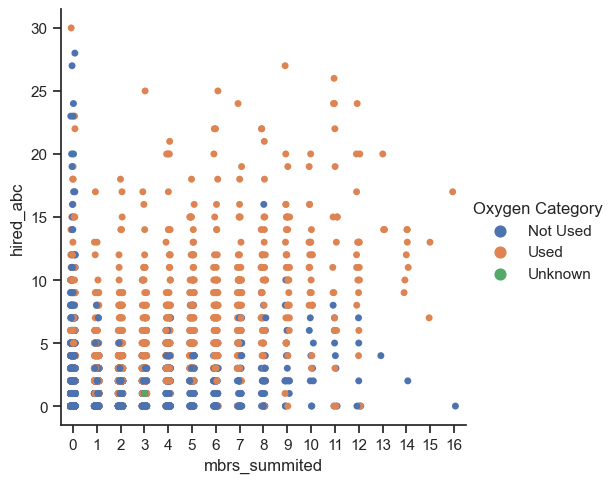

In [43]:
# Create a categorical plot for 'mbrs_summited' vs 'hired_abc' with the oxygen category

sns.set(style="ticks")
g = sns.catplot(x="mbrs_summited", y="hired_abc", hue="Oxygen Category", data=df_mount)

<b>Notes about output:</b> The blue "Not Used" plot points that indicate oxygen was not used look to be more visible on: 
- The 0 mark of 'hired_abc'. In other words, on expeditions when guides are not hired - which suggests guides may be influential in whether or not oxygen is used. 
- The 0 mark of 'mbrs_summited'. In other words, on expeditions where no members summit - which suggest they aren't reaching peak elevation and may not need oxygen.

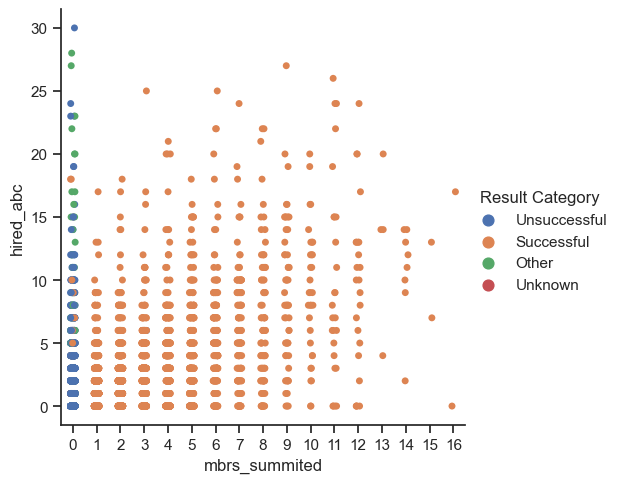

In [44]:
# Create a categorical plot for 'mbrs_summited' vs 'hired_abc' with the result category

sns.set(style="ticks")
g = sns.catplot(x="mbrs_summited", y="hired_abc", hue="Result Category", data=df_mount)

<b>Notes about output:</b> The blue "Unsuccessful" plot points and the green "Other" plot points are all lining up where 'mbrs_summited' = 0. This makes sense, as these "Unsuccessful"/"Other" values are associated with the expedition not reaching the summit (therefore 'mbrs_summited = 0).

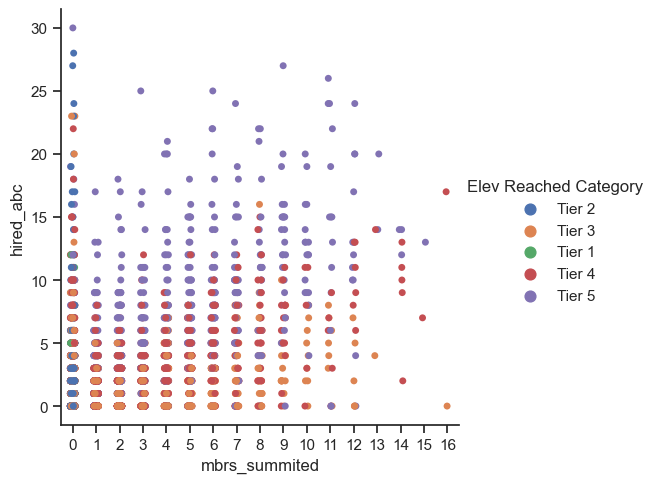

In [45]:
# Create a categorical plot for 'mbrs_summited' vs 'hired_abc' with the elevation reached category

sns.set(style="ticks")
g = sns.catplot(x="mbrs_summited", y="hired_abc", hue="Elev Reached Category", data=df_mount)

<b>Notes about output:</b> This one doesn't glean too much information, but it's interesting that where 'mbrs_summited' is greater than 1, the tier values are higher (Tiers 3 - Tiers 5 which indicate higher elevations). 

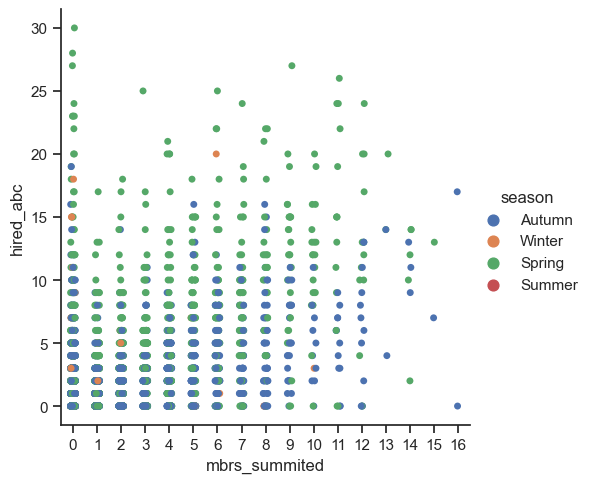

In [46]:
# Create a categorical plot for 'mbrs_summited' vs 'hired_abc' with the season category

sns.set(style="ticks")
g = sns.catplot(x="mbrs_summited", y="hired_abc", hue="season", data=df_mount)

<b> Notes about output:</b> It looks as though the main season in which expeditions are taking place is the Spring and Autumn. It also looks as though there are more hired guides in the Spring (since the blue "Spring" points are more "north" than the orange "Autumn" points).

### Analyzing 'max_elev_reached' vs 'total_days' with categories

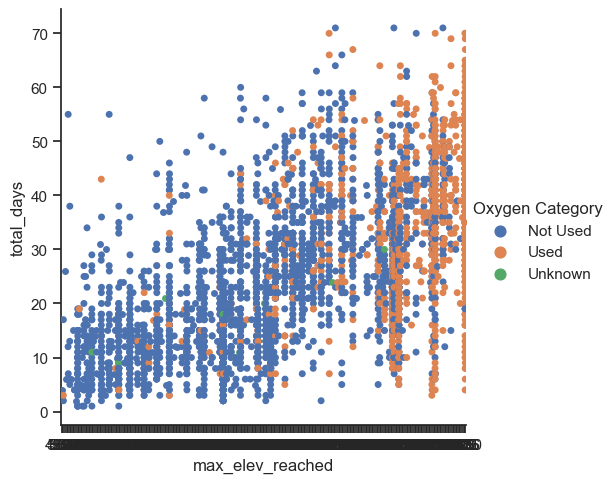

In [47]:
# Create a categorical plot for 'total_days' vs 'max_elev_reached' with the oxygen category

sns.set(style="ticks")
g = sns.catplot(x="max_elev_reached", y="total_days", hue="Oxygen Category", data=df_mount)

<b>Notes about output:</b> This graph clearly shows us that oxygen is used at higher elevations since the orange plot points are concentrated on the right side of the graph. On the otherhand, the total days of the expedition doesn't seem to drive if oxygen is used or not (or else we'd see a noticeable conccentration of orange points on the upper side of the graph vs. the lower half). Another interesting insight is the vertical lines made up by concentrated plot points spread throughout the graph. I suspect that each line indicates the summit height of a peak. 

KeyboardInterrupt: 

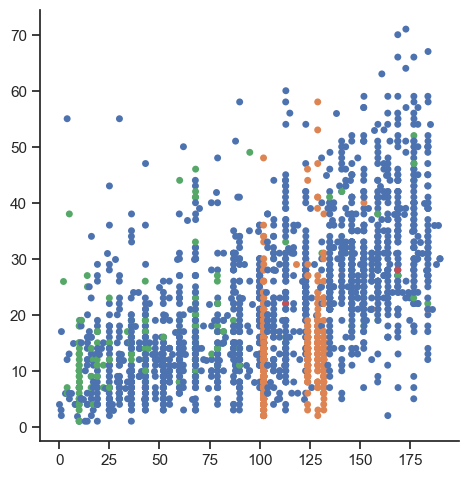

In [48]:
# Create a categorical plot for 'total_days' vs 'max_elev_reached' with the result category

sns.set(style="ticks")
g = sns.catplot(x="max_elev_reached", y="total_days", hue="Result Category", data=df_mount)

<b>Notes about output:</b> Building on our last graph, we can confirm that these verticle lines most likely indicate the peaks' summits (sense we're seeing these lines are associated with the orange "Successful" mark). Some vertical lines at lower elevations are green for "Other" which I'm not sure what that means. The orange "Successful" lines that are falling outside of the concentrated vertical areas are most likely expeditions that met their goal (i.e. it was successful) but their goal may have been a 'subpeak',

In [ ]:
# Create a categorical plot for 'total_days' vs 'max_elev_reached' with the elevation reached category

sns.set(style="ticks")
g = sns.catplot(x="max_elev_reached", y="total_days", hue="Elev Reached Category", data=df_mount)

<b>Notes about output:</b> This graph is a bit redundant in that our categories are just showing us the different max_elev_reached ranges we created. However, this is helpful in knowing what our max_elev_reached values are since I haven't quite figured out how to fix the axis labels yet ;D (TBD!)

In [ ]:
# Create a categorical plot for 'total_days' vs 'max_elev_reached' with the season category

sns.set(style="ticks")
g = sns.catplot(x="max_elev_reached", y="total_days", hue="season", data=df_mount)

<b>Notes about output:</b> This is another graph that shows us that most of the expeditions happen in the spring and fall. However, there is another interesting tidbit of information in that there are two vertical lines where points are condensed that are primarily blue (indicating that a couple of the tallest peaks are summited in the spring). There are condensed vertical lines in the middle range of elevation that indicate these summits took place in the fall. 

## Section 7: Initial Questions Revisited

Below, I've started to answer the initial questions defined in my project documentation. The answers to these questions are based on our 2010 - 2020 subset.

### Questions about peaks:

##### See below for table of peaks chosen for subset used in this analysis. 
<b>Q:</b> What peak is recorded for most attempts? What are the most popular peaks? (Same questions as I'm using the variable 'total_mbrs' for both). 

<b>A:</b> The most attempts/most popular peaks from 1990 to 2020 are Mount Everest (8149 visitors), Ama Dablam (4911 visitors), Cho Oyu (5151 visitors), Manaslu (2490 visitors), and Baruntse (1329 visitors).

<b>Q:</b> What are the tallest peaks?

<b>A:</b> With our expeditions dataset, we can find the highest peaks by the max elevation that expeditions reached from 2010 - 2020. However, this excludes unclimbed peaks and peaks that have not been summited in the last decade. Mount Everest is known for being the tallest peak at 8850 m, but other peaks where climbers have reached great heights include Kangchenjunga (max height reached 8586), Lhotse (max height reached 8516), Makalu (max height reached 8485), and Cho Oyu (max height reached 8188).

<b>Q:</b> What are the deadliest peaks?
- For the deadliest peaks, what are the top causes of death?
    
<b>A:</b> The expeditions dataset does not include reasons for death (this is found in the 'deaths' dataset), but our expeditions dataset tells us that the deadliest peaks from 1990 - 2020 are Mount Everest (73 deaths), Manaslu (37 deaths), Dhaulagiri I (32 deaths), and Annapurna I (20 deaths).

| Peak Name | Peak ID | Deadliest (by mbr_deaths) | Tallest (by max_eval_reached) | Most Popular (by total_mbrs) |
| :-: | :-: | :-: | :-: | :-: |
| Everest | EVER | 73 | 8850 | 8149 |
| Manaslu | MANA | 37 | | 2490 |
| Dhaulagiri I | DHA1 | 32 | | 1288 |
| Annapurna I | ANN1 | 20 | | |
| Pumori | PUMO | 16 | | 1072 |
| Kangchenjunga | KANG | 15 | 8586 | |
| Ama Dablam | AMAD | 14 | | 4911 |
| Lhotse | LHOT | 7 | 8516 | 1266 |
| Baruntse | BARU | | | 1329 |
| Cho Oyu | CHOY | 22 | 8188 | 5151 |
| Makalu | MAKA | 13 | 8485 | 1137 |
| Himlung Himal | HIML | | | 706 |


<i>Note: An empty field indicates this peak was not a "top ten" for the category shown in the header, but it is still included in our subset.</i>

### Questions about expeditions:
<b>Q:</b> What nationality is most represented by expeditions?

<b>A:</b> TBD

<b>Q:</b> Is there a season most expeditions choose to climb?

<b>A:</b> Most expeditions look to take place during the spring or fall.

<b>Q:</b> How many expeditions happen each year?
- By season?

<b>A:</b> TBD

<b>Q:</b> What percentage of expeditions bring O2?
- What percentage of expeditions use O2?

<b>A:</b> TBD

<b>Q:</b> What percentage of expeditions have hired guides?
- What percentage of expeditioners are hired guides? (Ratio)

<b>A:</b> TBD

<b>Q:</b> What is the average number of expedition members?

<b>A:</b> Our descriptive statistics tell us that the average number of expedition members is 4.4. 

## Section 8: Potential Hypotheses

- The taller the peak, the more likely a guide will be hired.
- The taller the peak, the more likely oxygen will be used.
- If a guide is hired, an expedition is more likely to reach the summit.

## Section 9: Exporting dataframe "df_mount" as "expeditions_peak_recent_subset.pkl"

In [50]:
df_mount.shape

(5776, 30)

In [49]:
# Export data to pkl
df_mount.to_csv(os.path.join(path, '02 Data','Prepared Data', 'expeditions_peak_30yrs_USE_THIS.csv'))